<a href="https://colab.research.google.com/github/shreyaa2506/SQL_Project/blob/main/Analyzing_Orders_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install kaggle


In [14]:
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv


Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
100% 200k/200k [00:00<00:00, 742kB/s]
100% 200k/200k [00:00<00:00, 741kB/s]


In [15]:
import zipfile
zip_ref=zipfile.ZipFile('orders.csv.zip')
zip_ref.extractall()
zip_ref.close()

In [16]:
import pandas as pd
df=pd.read_csv('orders.csv',na_values=['Not Available','unknown'])
df['Ship Mode'].unique()


array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [17]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df.head(20)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [18]:
df['discount']=df['list_price']*df['discount_percent']*.01
df['sale_price']=df['list_price']-df['discount']
df['profit']=df['sale_price']-df['cost_price']
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9,29.1,-0.9


In [19]:
df['order_date']=pd.to_datetime(df['order_date'],format="%Y-%m-%d")
df.dtypes

order_id                     int64
order_date          datetime64[ns]
ship_mode                   object
segment                     object
country                     object
city                        object
state                       object
postal_code                  int64
region                      object
category                    object
sub_category                object
product_id                  object
cost_price                   int64
list_price                   int64
quantity                     int64
discount_percent             int64
discount                   float64
sale_price                 float64
profit                     float64
dtype: object

In [20]:
df.drop(columns=['list_price','cost_price','discount_percent'],inplace=True)

In [21]:
import sqlite3

In [22]:
cnn=sqlite3.connect('data4.db')


In [23]:
%load_ext sql
%sql sqlite:///data4.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [24]:
%%sql
CREATE table orders(
       [order_id] int primary key
      ,[order_date] date
      ,[ship_mode] varchar(20)
      ,[segment] varchar(20)
      ,[country] varchar(20)
      ,[city] varchar(20)
      ,[state] varchar(20)
      ,[postal_code] varchar(20)
      ,[region] varchar(20)
         ,[category] varchar(20)
      ,[sub_category] varchar(20)
      ,[product_id] varchar(50)
      ,[quantity] int
      ,[discount] decimal(7,2)
      ,[sale_price] decimal(7,2)
      ,[profit] decimal(7,2))

 * sqlite:///data4.db
(sqlite3.OperationalError) table orders already exists
[SQL: CREATE table orders(
       [order_id] int primary key
      ,[order_date] date
      ,[ship_mode] varchar(20)
      ,[segment] varchar(20)
      ,[country] varchar(20)
      ,[city] varchar(20)
      ,[state] varchar(20)
      ,[postal_code] varchar(20)
      ,[region] varchar(20)
         ,[category] varchar(20)
      ,[sub_category] varchar(20)
      ,[product_id] varchar(50)
      ,[quantity] int
      ,[discount] decimal(7,2)
      ,[sale_price] decimal(7,2)
      ,[profit] decimal(7,2))]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [25]:
df.to_sql('orders',con=cnn, index=False, if_exists='append')

9994

In [26]:
#find top 10 highest revenue generating products
%%sql
select product_id,sum(sale_price) as sale
from orders
GROUP BY product_id
ORDER BY sale DESC LIMIT 10 ;

 * sqlite:///data4.db
Done.


product_id,sale
TEC-CO-10004722,59514
OFF-BI-10003527,26525.300000000003
TEC-MA-10002412,21734.4
FUR-CH-10002024,21096.2
OFF-BI-10001359,19090.2
OFF-BI-10000545,18249.0
TEC-CO-10001449,18151.2
TEC-MA-10001127,17906.4
OFF-BI-10004995,17354.8
OFF-SU-10000151,16325.8


In [46]:
query = """
SELECT product_id, SUM(sale_price) AS sale
FROM orders
GROUP BY product_id
ORDER BY sale DESC
LIMIT 10;
"""

In [30]:
df_top10 = pd.read_sql_query(query, cnn)

Text(0.5, 1.0, 'Top 10 Highest Revenue Generating Products')

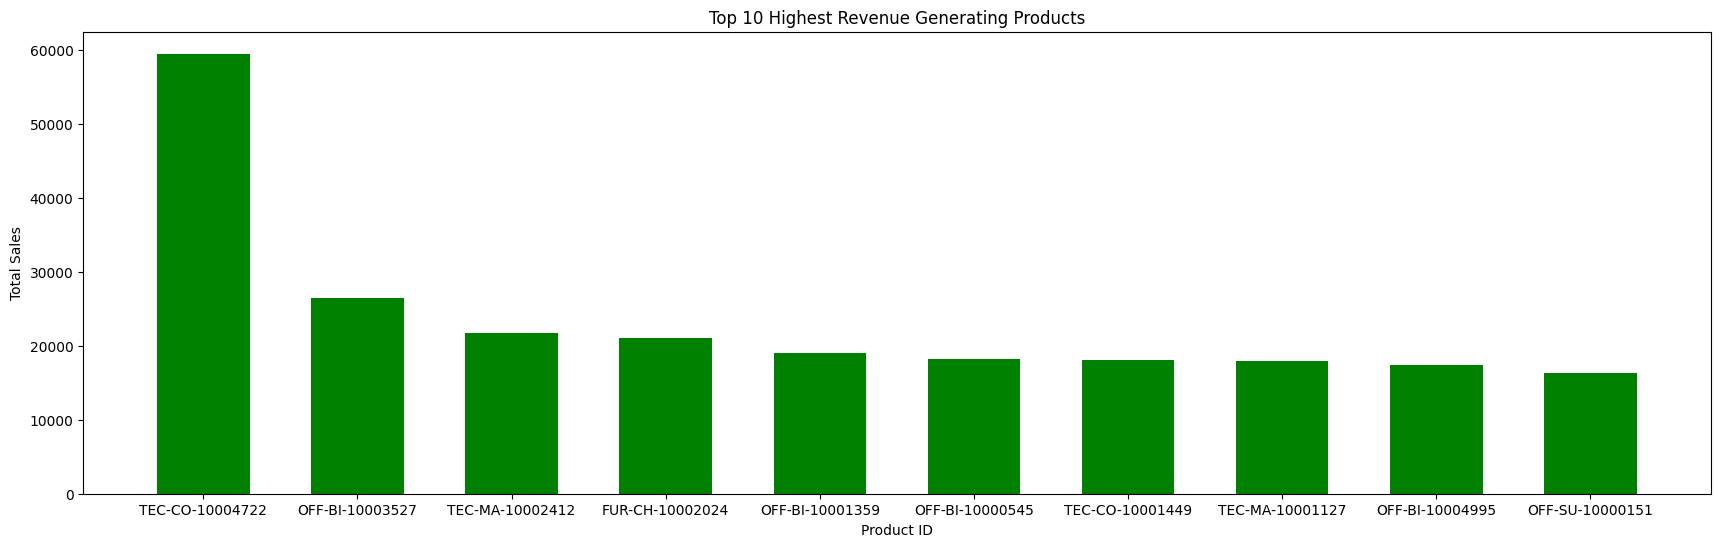

In [62]:
plt.figure(figsize=(21, 6))
plt.bar(df_top10['product_id'], df_top10['sale'], width = 0.6, color='g')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.title('Top 10 Highest Revenue Generating Products')


In [ ]:
%%sql
with cte as(
select region, product_id, sum(sale_price) as sale
from orders
GROUP BY region, product_id)
select * from(
SELECT *
    ,row_number() over(partition by region ORDER BY sale DESC) as rn
from cte) A
where rn <= 5

 * sqlite:///data4.db
Done.


region,product_id,sale,rn
Central,TEC-CO-10004722,16975,1
Central,TEC-MA-10000822,13770.0,2
Central,OFF-BI-10001120,11056.5,3
Central,OFF-BI-10000545,10132.7,4
Central,OFF-BI-10004995,8416.1,5
East,TEC-CO-10004722,29099,1
East,TEC-MA-10001047,13767,2
East,FUR-BO-10004834,11274.1,3
East,OFF-BI-10001359,8463.599999999999,4
East,TEC-CO-10001449,8316,5


In [36]:
query1 = """
WITH cte AS (
    SELECT region, product_id, SUM(sale_price) AS sale
    FROM orders
    GROUP BY region, product_id
)
SELECT *
FROM (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY region ORDER BY sale DESC) AS rn
    FROM cte
) A
WHERE rn <= 5;
"""
df_top5_per_region = pd.read_sql_query(query1, cnn)

In [37]:
region_sales = df_top5_per_region.groupby('region')['sale'].sum().reset_index()

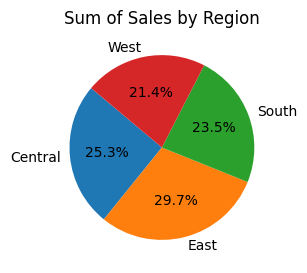

In [40]:
plt.figure(figsize=(3, 3))
plt.pie(region_sales['sale'], labels=region_sales['region'], autopct='%1.1f%%', startangle=140)
plt.title('Sum of Sales by Region')
plt.show()

In [ ]:
%%sql
with cte as(
SELECT STRFTIME('%Y',order_date) AS order_year, STRFTIME('%m',order_date) AS order_month, sum(sale_price) as sale
from orders
group by strftime('%Y',order_date),strftime('%m',order_date)
)
SELECT order_month
, sum(CASE WHEN order_year= '2022' THEN sale ELSE 0 END) as sales_2022
, sum(CASE WHEN order_year= '2023' THEN sale ELSE 0 END) as sales_2023
from cte
group by order_month
order by order_month

 * sqlite:///data4.db
Done.


order_month,sales_2022,sales_2023
01,94712.49999999997,88632.6
02,90091.0,128124.20000000011
03,80105.99999999996,82512.29999999994
04,95451.60000000005,111568.60000000006
05,79448.29999999993,86447.89999999994
06,94170.49999999999,68976.5
07,78652.20000000003,90563.79999999993
08,104807.99999999996,87733.59999999999
09,79142.19999999991,76658.59999999993
10,118912.69999999998,121061.49999999993


In [47]:
query2 = """
WITH cte AS (
    SELECT STRFTIME('%Y', order_date) AS order_year, STRFTIME('%m', order_date) AS order_month, SUM(sale_price) AS sale
    FROM orders
    GROUP BY STRFTIME('%Y', order_date), STRFTIME('%m', order_date)
)
SELECT order_month,
       SUM(CASE WHEN order_year = '2022' THEN sale ELSE 0 END) AS sales_2022,
       SUM(CASE WHEN order_year = '2023' THEN sale ELSE 0 END) AS sales_2023
FROM cte
GROUP BY order_month
ORDER BY order_month;
"""

In [51]:
df_sales = pd.read_sql_query(query2, cnn)

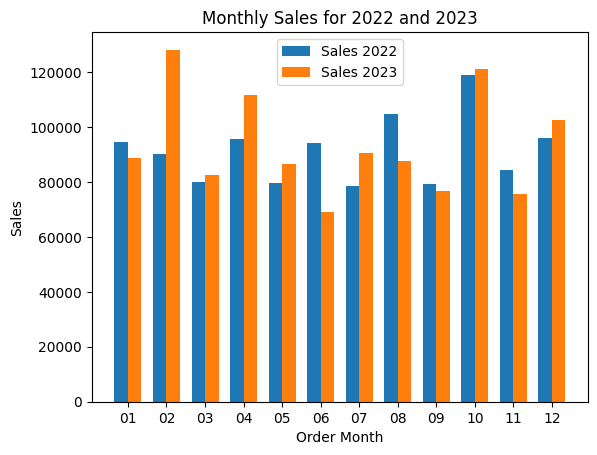

In [53]:
import numpy as np
labels = df_sales['order_month']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


# Create the plot
fig, ax = plt.subplots()

# Plot bars for 2022 and 2023
ax.bar(x - width/2, df_sales['sales_2022'], width, label='Sales 2022')
ax.bar(x + width/2, df_sales['sales_2023'], width, label='Sales 2023')
# Add labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Order Month')
ax.set_ylabel('Sales')
ax.set_title('Monthly Sales for 2022 and 2023')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()

In [ ]:
%%sql
with cte as(
select category, strftime('%Y%m',order_date) as order_year_month, sum(sale_price) as sale
from orders
group by category,strftime('%Y%m',order_date)
order by category,strftime('%Y%m',order_date)
)
select * from(
select *,
row_number() over(partition by category order by sale desc) as rn
from cte
) a
where rn=1

 * sqlite:///data4.db
Done.


category,order_year_month,sale,rn
Furniture,202210,42888.90000000001,1
Office Supplies,202302,44118.499999999985,1
Technology,202310,53000.10000000002,1


In [63]:
query3 = """
WITH cte AS (
    SELECT category, STRFTIME('%Y%m', order_date) AS order_year_month, SUM(sale_price) AS sale
    FROM orders
    GROUP BY category, STRFTIME('%Y%m', order_date)
    ORDER BY category, STRFTIME('%Y%m', order_date)
)
SELECT *
FROM (
    SELECT *,
           ROW_NUMBER() OVER(PARTITION BY category ORDER BY sale DESC) AS rn
    FROM cte
) A
WHERE rn = 1;
"""


In [64]:
df = pd.read_sql_query(query3, cnn)

Text(0.5, 1.0, 'Sales Distribution by Category')

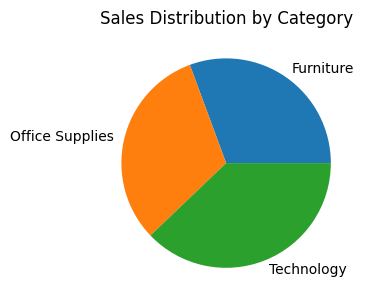

In [70]:
plt.figure(figsize=(3.5, 3.4))
plt.pie(df['sale'], labels=df['category'])
plt.title('Sales Distribution by Category')


In [ ]:
%%sql
with cte as(
SELECT sub_category, STRFTIME('%Y',order_date) AS order_year, sum(sale_price) as sale
from orders
group by sub_category, strftime('%Y',order_date)
)
,cte2 as(
SELECT sub_category
, sum(CASE WHEN order_year= '2022' THEN sale ELSE 0 END) as sales_2022
, sum(CASE WHEN order_year= '2023' THEN sale ELSE 0 END) as sales_2023
from cte
group by sub_category
order by sub_category
)
select *
,(sales_2023-sales_2022)*100/sales_2022 as group_percent
from cte2
order by (sales_2023-sales_2022)/sales_2022 desc limit 1

 * sqlite:///data4.db
Done.


sub_category,sales_2022,sales_2023,group_percent
Supplies,16140.700000000003,28917.399999999998,79.1582769024887
